In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
copied_df = df.copy()
copied_df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [ ]:
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:
copied_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
copied_df.duplicated().sum()

0

In [ ]:
copied_df['Experience_Level'].unique()

array([3, 2, 1])

In [ ]:
copied_df['Experience_Level'] = copied_df['Experience_Level'].apply(lambda x: 'Beginner' if x == 1 else 'Intermediate' if x == 2 else 'Expert')
copied_df['Experience_Level']

,Experience_Level
0,Expert
1,Intermediate
2,Intermediate
3,Beginner
4,Beginner
...,...
968,Expert
969,Beginner
970,Expert
971,Intermediate


In [ ]:
copied_df['Experience_Level'].unique()

array(['Expert', 'Intermediate', 'Beginner'], dtype=object)

# EDA

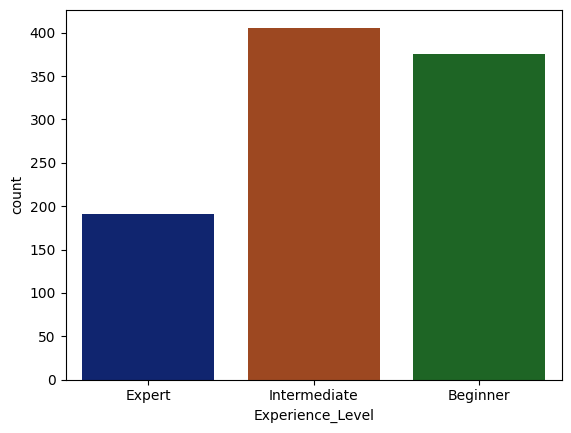

In [ ]:
sns.countplot(x = 'Experience_Level', data = copied_df, palette='dark')
plt.show()

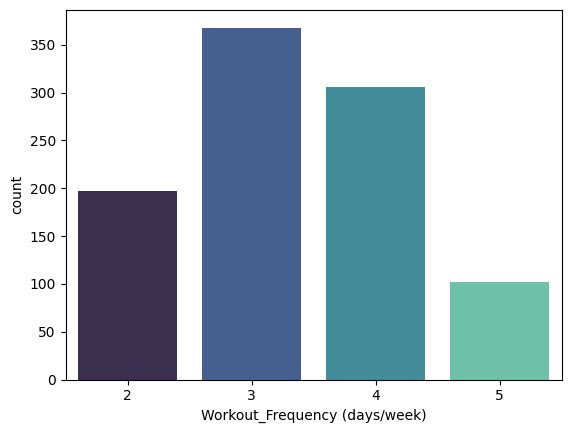

In [ ]:
sns.countplot(x = 'Workout_Frequency (days/week)', data = copied_df, palette = 'mako')
plt.show()

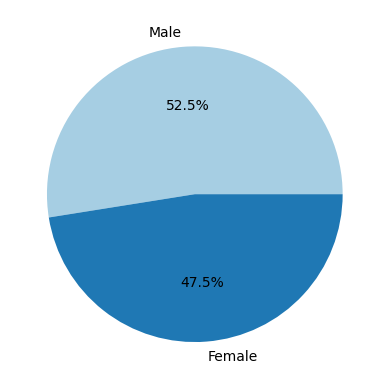

In [ ]:
gender_counts = copied_df['Gender'].value_counts()
palette_colors = sns.color_palette('Paired')
plt.pie(gender_counts.values, labels = gender_counts.index, autopct = '%.1f%%', colors = palette_colors)
plt.show()

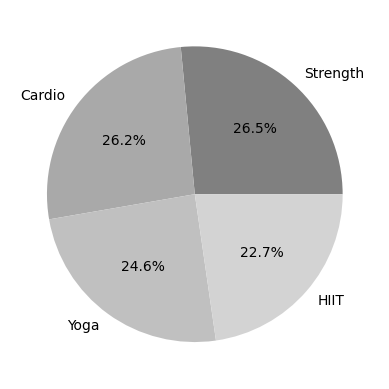

In [ ]:
workout_counts = copied_df['Workout_Type'].value_counts()
plt.pie(workout_counts.values,
        labels = workout_counts.index,
        autopct = "%1.1f%%",
        colors = ['grey','darkgray','silver','lightgray'])
plt.show()

Observation:
1. We have more intermediates and beginners in our gym than experts.
2. Most people come to the gym 3 and 4 days per week.
3. We have more male than female.
4. Strength and cardio are high compared to yoga and HIIT.

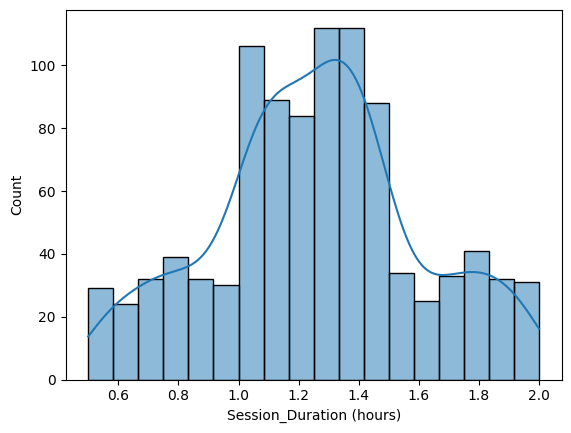

In [ ]:
sns.histplot(x = 'Session_Duration (hours)', data = copied_df, kde = True)
plt.show()

Observation: The majority of people work out for 1 and 1.5 hours, which suggests that moderately long workouts are preferred by most people.

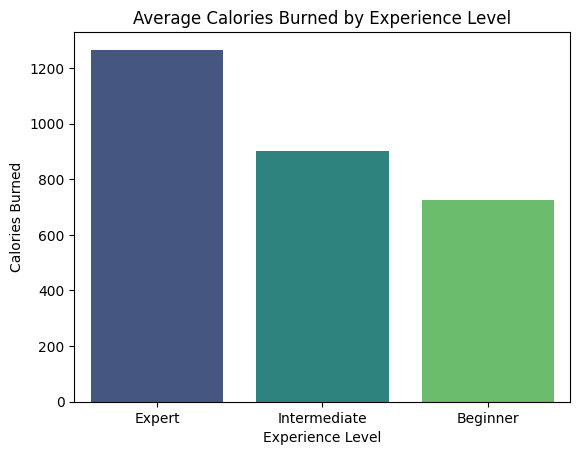

In [ ]:
sns.barplot(data=copied_df, x='Experience_Level', y='Calories_Burned', ci=None, palette='viridis')
plt.title('Average Calories Burned by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')
plt.show()

Observation: Experts tend to burn higher calories more efficiently compared to individuals at other experience levels.

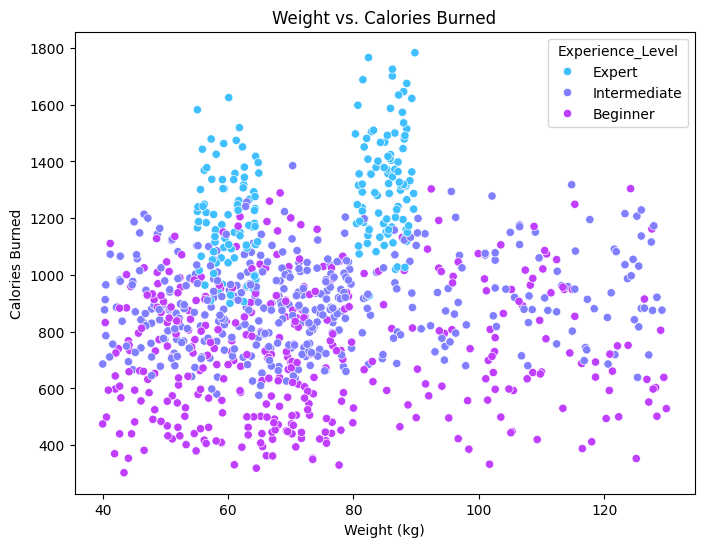

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=copied_df, x='Weight (kg)', y='Calories_Burned', hue='Experience_Level', palette='cool')
plt.title('Weight vs. Calories Burned')
plt.xlabel('Weight (kg)')
plt.ylabel('Calories Burned')
plt.show()

Observation:
1. Experts typically weigh less than 85kg, while both beginners and intermediates have weights exceeding 120kg.

2. Beginners struggle to burn more calories compared to others, as they are the only group with calorie burns under 500.

3. The calorie burn range for beginners is approximately between 100 and 1300 calories.

4. The calorie burn range for intermediates is approximately between 600 and 1400 calories.

5. The calorie burn range for experts is approximately between 900 and 1800 calories.

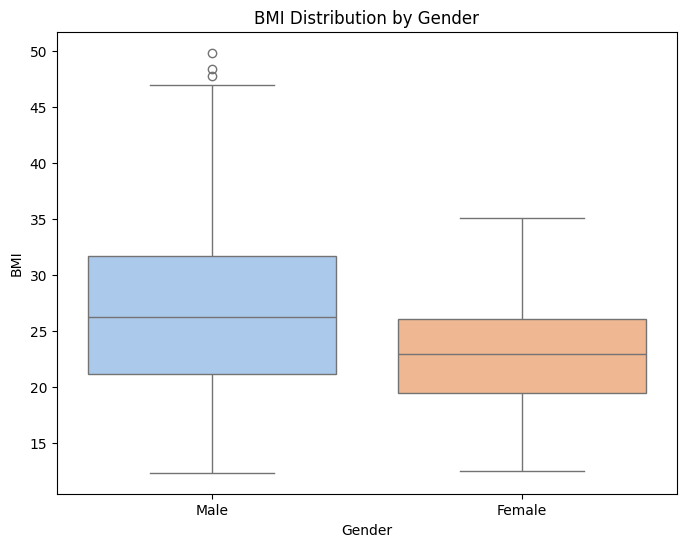

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=copied_df, x='Gender', y='BMI', palette='pastel')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

Observation:
1. Male and female BMI values are approximately the same in the lower range.

2. However, male and female BMI values show significant differences in the median and maximum ranges.

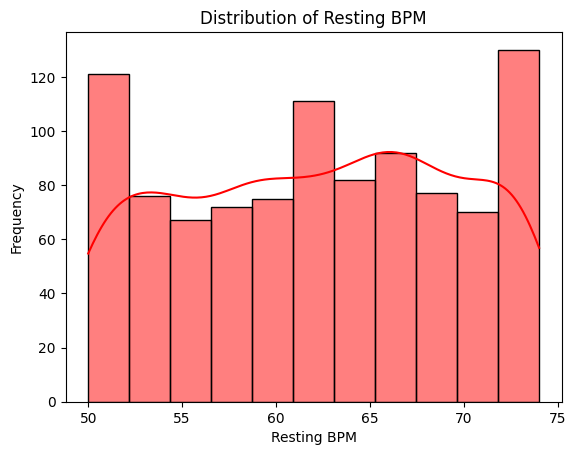

In [ ]:
sns.histplot(data=copied_df, x='Resting_BPM', kde=True, color = 'red')
plt.title('Distribution of Resting BPM')
plt.xlabel('Resting BPM')
plt.ylabel('Frequency')
plt.show()

Observation: Resting BPM values seem to be approximately equally distributed across the range.

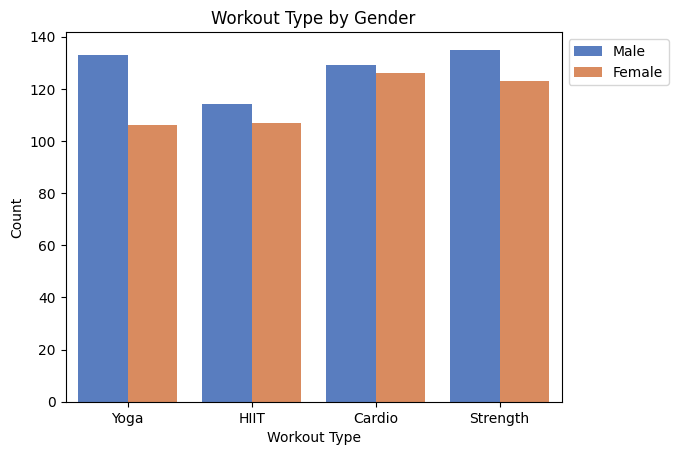

In [ ]:
sns.countplot(data=copied_df, x='Workout_Type', hue='Gender', palette='muted')
plt.title('Workout Type by Gender')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Observation:

* **Yoga:** Males participate more than females (approx. 135 males vs. 115 females).

* **HIIT:** Equal participation from both genders (around 110 each).

* **Cardio:** Males slightly outnumber females (approx. 125 males vs. 120 females).

* **Strength:** Higher male participation compared to females (approx. 135 males vs. 125 females).

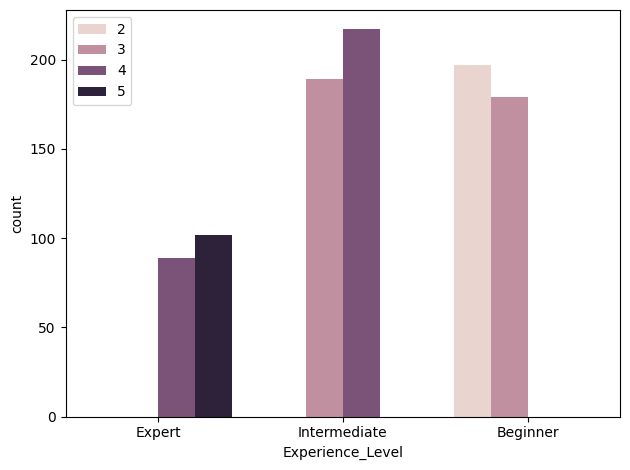

In [ ]:
sns.countplot(x = 'Experience_Level', data = copied_df, hue = 'Workout_Frequency (days/week)')
plt.legend(loc = 'upper left' )
plt.tight_layout()
plt.show()

Observation:
1. Beginners are more likely to work out 2 to 3 times per week.
2. Intermediates are more likely to work out 3 to 4 times per week.
3. Experts are more likely to work out 4 to 5 times per week.


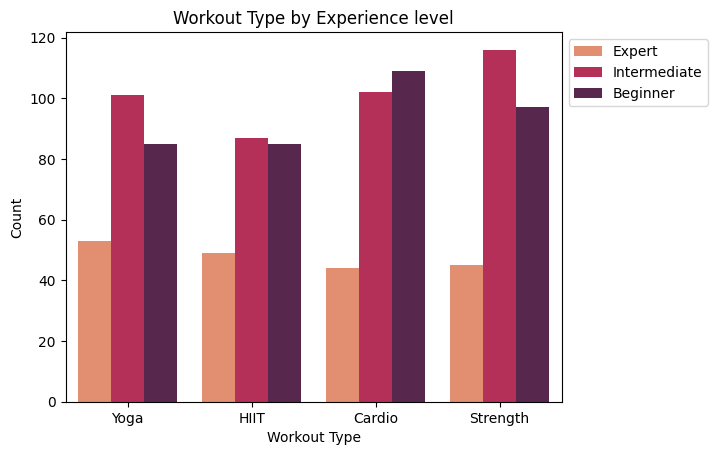

In [ ]:
sns.countplot(data=copied_df, x='Workout_Type', hue='Experience_Level', palette='rocket_r')
plt.title('Workout Type by Experience level')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Observation:
* **Yoga:** It is mostly preferred by both intermediates and beginners, with intermediates having a slightly higher count.

* **HIIT:** It is almost equally preferred by both intermediates and beginners, with intermediates having a slightly higher count.

* **Cardio:** It is almost equally preferred by both intermediates and beginners, with intermediates having a slightly higher count.

* **Strength:** It is mostly preferred by intermediates, followed by beginners, with intermediates having the highest count.

* **Experts:** Most experts prefer yoga and HIIT, followed by strength workouts. Cardio is the least preferred by experts.

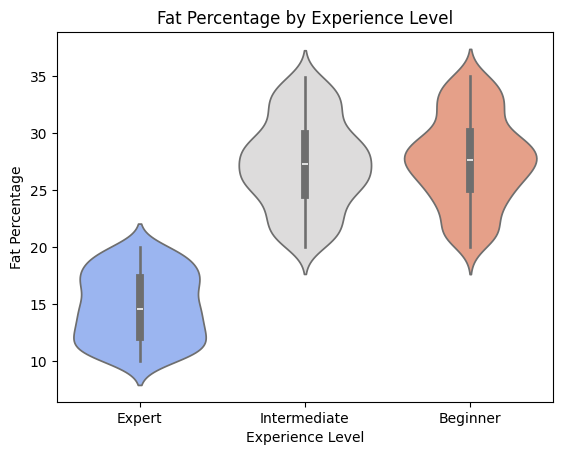

In [ ]:
sns.violinplot(data=copied_df, x='Experience_Level', y='Fat_Percentage', palette='coolwarm')
plt.title('Fat Percentage by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Fat Percentage')
plt.show()

Observation:
* **Experts:** Have the lowest fat percentage distribution.

* **Intermediates:** Fall between experts and beginners but closer to experts.

* **Beginners:** Show the highest fat percentage distribution.

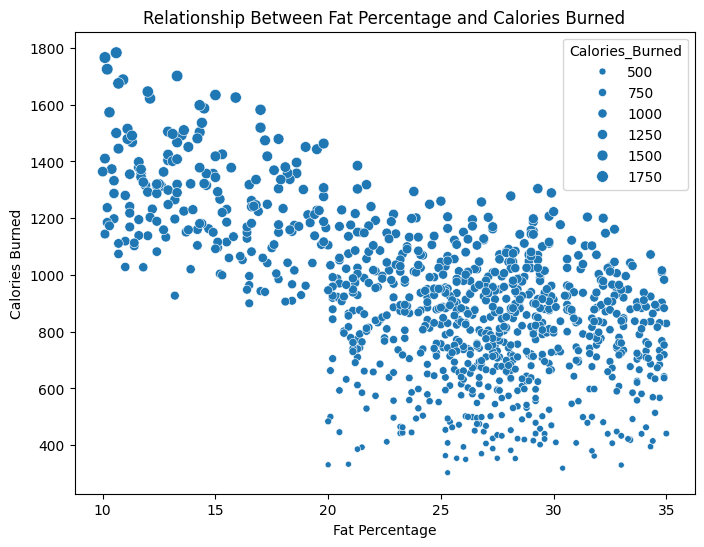

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=copied_df, x='Fat_Percentage', y='Calories_Burned', palette='viridis', size='Calories_Burned')
plt.title('Relationship Between Fat Percentage and Calories Burned')
plt.xlabel('Fat Percentage')
plt.ylabel('Calories Burned')
plt.show()

Observation: The Relationship Between Fat Percentage and Calories Burned is negative correlation.

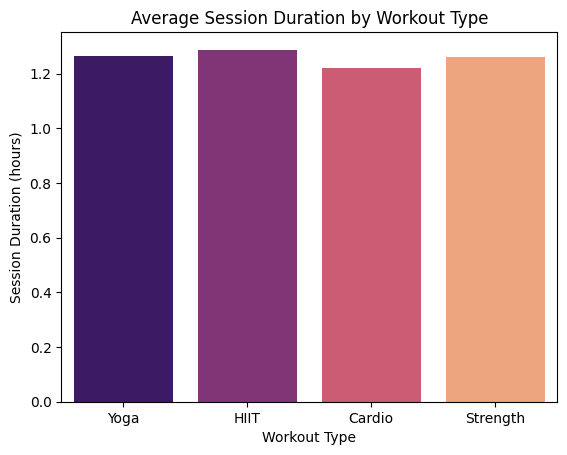

In [ ]:
sns.barplot(data=copied_df, x='Workout_Type', y='Session_Duration (hours)', ci=None, palette='magma')
plt.title('Average Session Duration by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Session Duration (hours)')
plt.show()

Observation: The average session duration across different workout types remains relatively consistent.

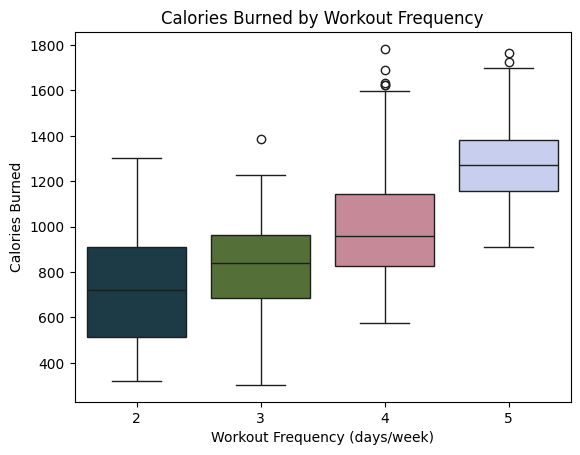

In [ ]:
sns.boxplot(data=copied_df, x='Workout_Frequency (days/week)', y='Calories_Burned', palette='cubehelix')
plt.title('Calories Burned by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Calories Burned')
plt.show()

Observation: As workout frequency increases, the calories burned also increase, indicating a positive correlation between the two.

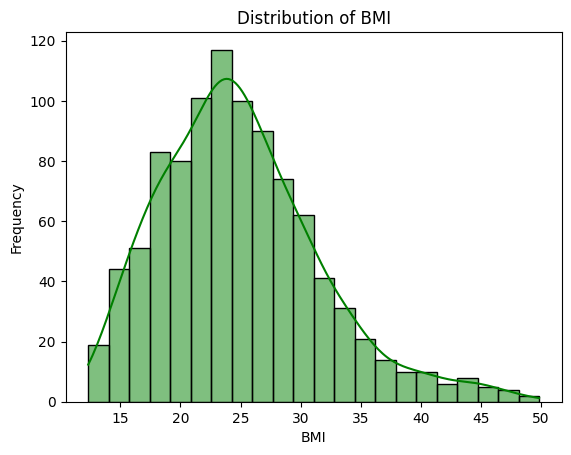

In [ ]:
sns.histplot(data=copied_df, x='BMI', kde=True, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Observation:
1. Most Common BMI: approx 25.

2. Wide Range: BMI values from approx 10 to 50.

3. Gradual Decrease: Frequencies drop as BMI moves away from approx 25.

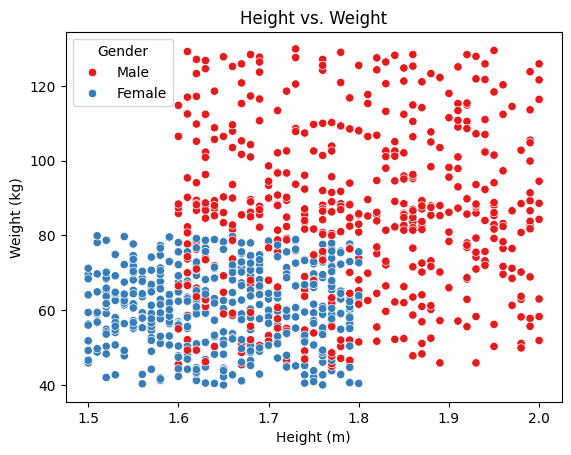

In [ ]:
sns.scatterplot(data=copied_df, x='Height (m)', y='Weight (kg)', hue='Gender', palette='Set1')
plt.title('Height vs. Weight')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

Observation:
1. Female height ranges from approximately 1.5 to 1.8 meters, with weight ranging from over 40 kg to around 80 kg.

2. Male height ranges from approximately 1.6 to 2 meters, with weight ranging from over 40 kg to around 130 kg.

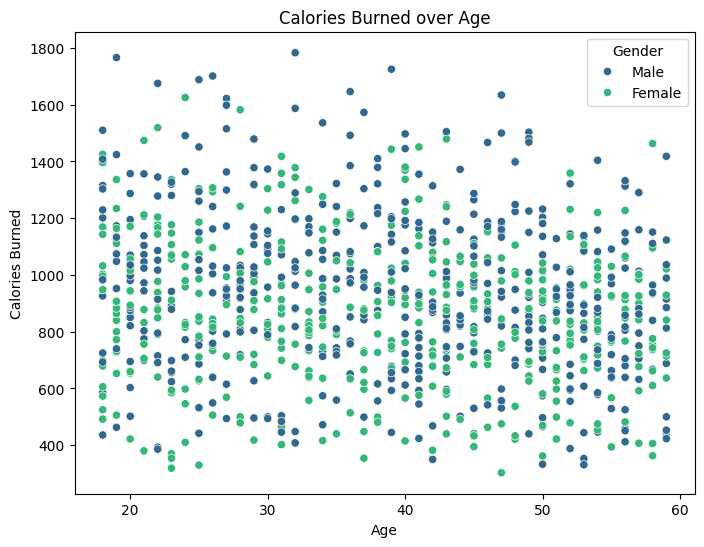

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=copied_df, x='Age', y='Calories_Burned', hue='Gender', palette='viridis')
plt.title('Calories Burned over Age')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.show()

Observation: Age does not significantly affect calories burned.

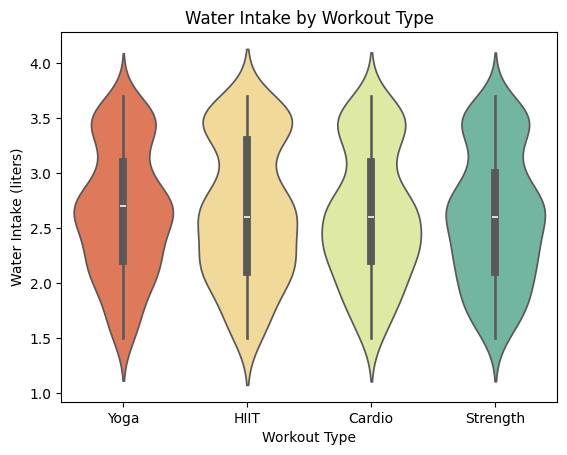

In [ ]:
sns.violinplot(data=copied_df, x='Workout_Type', y='Water_Intake (liters)', palette='Spectral')
plt.title('Water Intake by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Water Intake (liters)')
plt.show()

Observation:

* **Water Intake Variation:** Yoga participants exhibit a wider range of water intake compared to HIIT, Cardio, and Strength participants.

* **Peak Water Intake:** The peak water intake appears to be around 3 liters for HIIT, Cardio, and Strength workouts.

* **Yoga Water Intake:** Yoga participants, on average, seem to consume less water compared to the other workout types.

* **Strength Workout Variation:** Strength training participants show the widest range of water intake, indicating significant individual differences in hydration habits within this group.

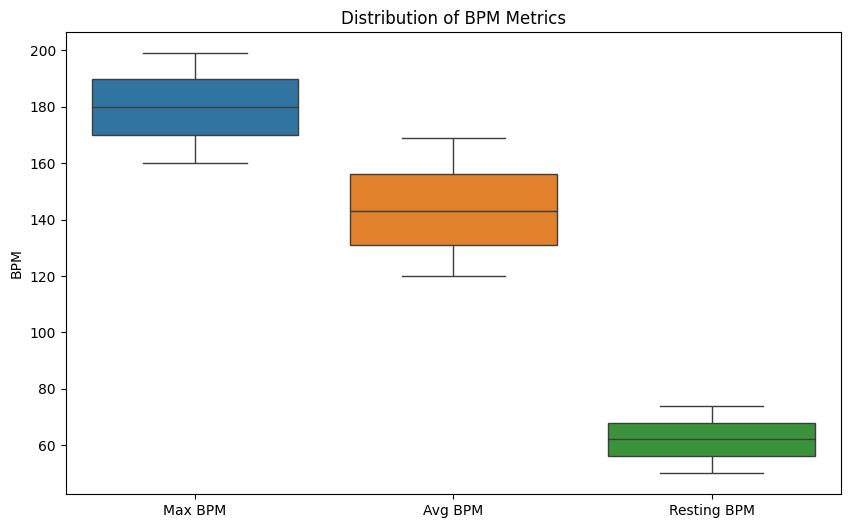

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=copied_df[['Max_BPM', 'Avg_BPM', 'Resting_BPM']])
plt.title('Distribution of BPM Metrics')
plt.ylabel('BPM')
plt.xticks([0, 1, 2], ['Max BPM', 'Avg BPM', 'Resting BPM'])
plt.show()

Observation:
1. Individuals in the dataset have a healthy range of resting heart rates.

2. The average heart rate is significantly lower than the maximum heart rate, indicating a healthy cardiovascular system.

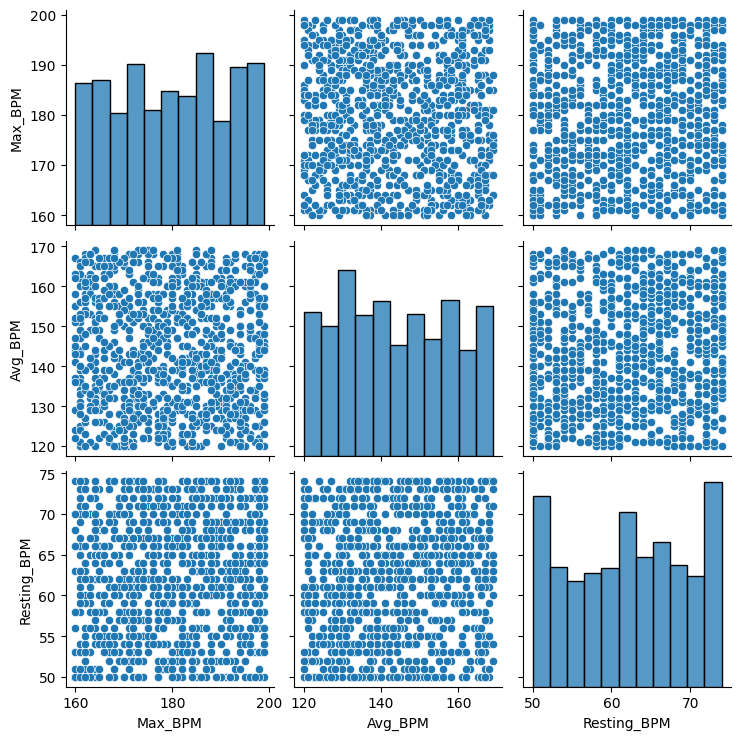

In [ ]:
sns.pairplot(copied_df[['Max_BPM', 'Avg_BPM', 'Resting_BPM']])
plt.show()

Observation: It doesn't not show any strong linear correlation between the three variables.

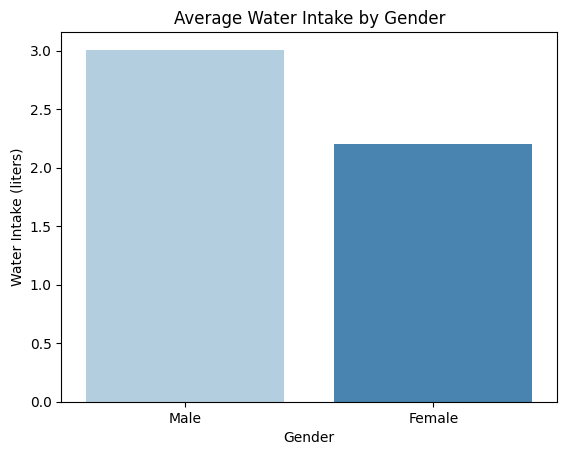

In [ ]:
sns.barplot(data=copied_df, x='Gender', y='Water_Intake (liters)', ci=None, palette='Blues')
plt.title('Average Water Intake by Gender')
plt.xlabel('Gender')
plt.ylabel('Water Intake (liters)')
plt.show()

Observation: Avg water intake of male is higher than female.

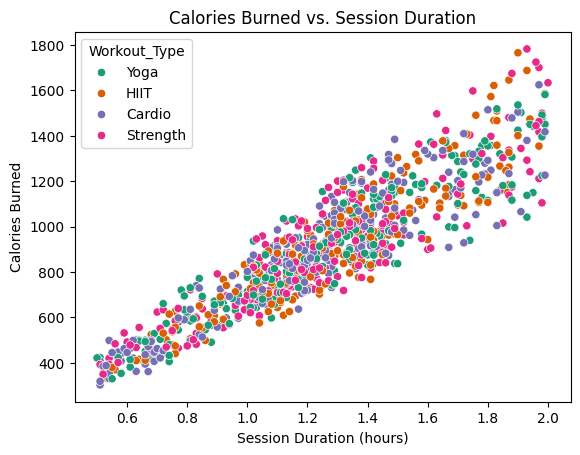

In [ ]:
sns.scatterplot(data=copied_df, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', palette='Dark2')
plt.title('Calories Burned vs. Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

Observation: As session duration increases, the calories burned also increase, demonstrating a positive correlation between the two.

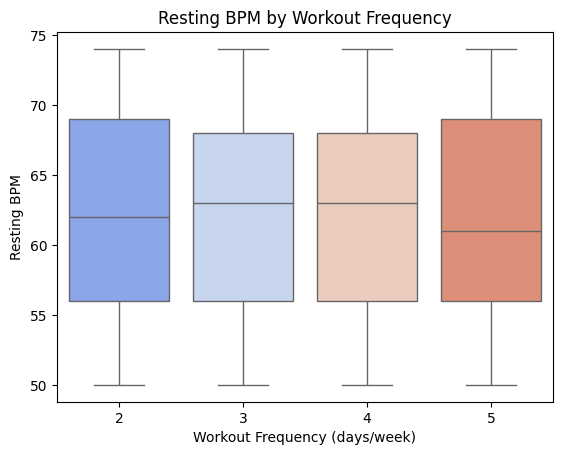

In [ ]:
sns.boxplot(data=copied_df, x='Workout_Frequency (days/week)', y='Resting_BPM', palette='coolwarm')
plt.title('Resting BPM by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Resting BPM')
plt.show()

Observation:
1. Individuals who work out more frequently tend to have slightly lower resting heart rates. This suggests that regular exercise can improve cardiovascular health.

2. The variation in resting BPM is similar across different workout frequencies, indicating that other factors besides workout frequency may influence resting heart rate.

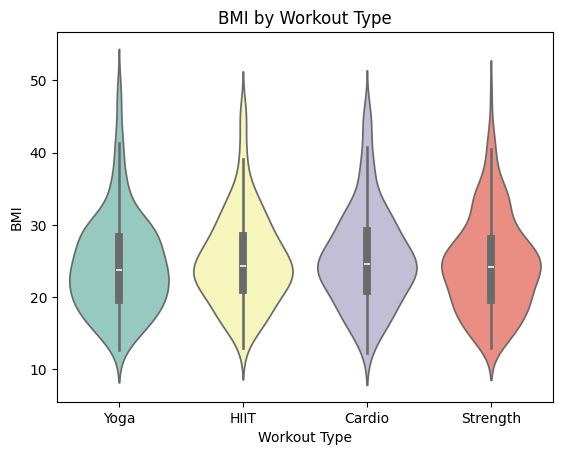

In [ ]:
sns.violinplot(data=copied_df, x='Workout_Type', y='BMI', palette='Set3')
plt.title('BMI by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('BMI')
plt.show()

Observation: The distribution of BMI across all workout types appears to be relatively similar, indicating that all workout types yield nearly the same results.

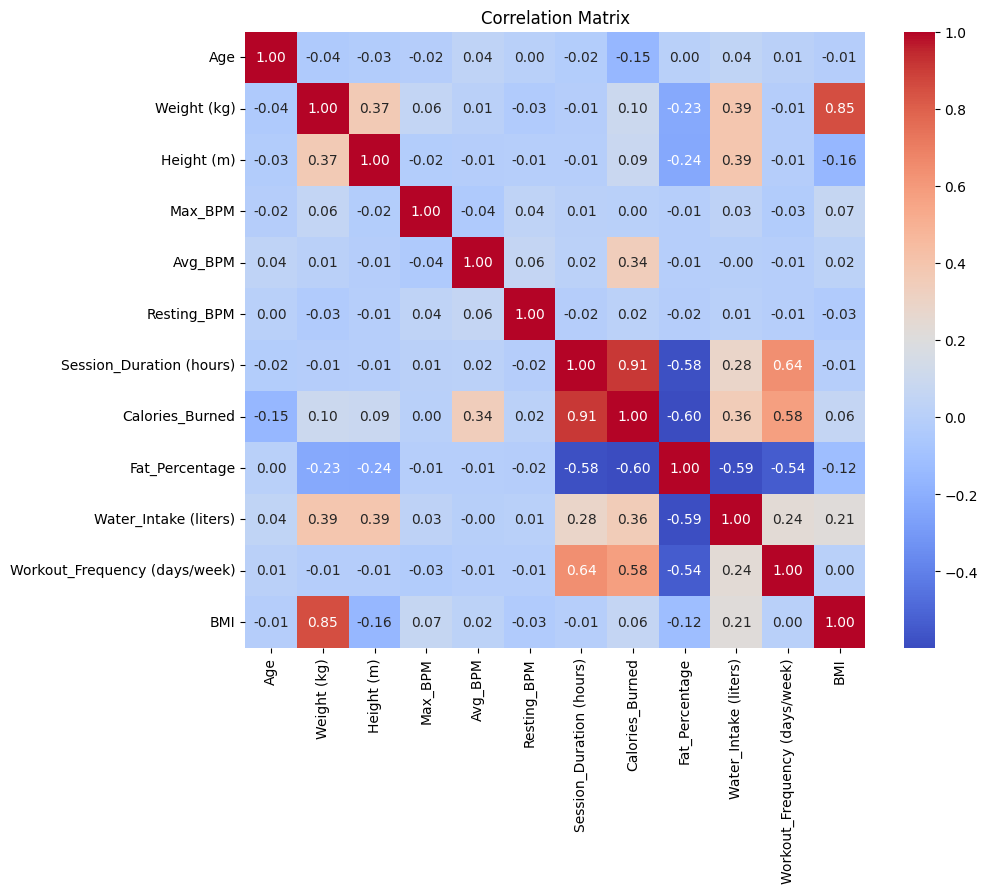

In [ ]:
numeric_columns = copied_df.select_dtypes(include=['number'])

# Heatmap: Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Observation:
1. **Weight and BMI:** There is a strong positive correlation between weight and BMI.

2. **Water Intake and BMI:** There is a moderate positive correlation between water intake and BMI.

3. **Calories Burned and Session Duration:** There is a strong positive correlation between calories burned and session duration.

4. **Fat Percentage and Calories Burned:** There is a moderate negative correlation between fat percentage and calories burned.

5. **Workout Frequency and Calories Burned:** There is a moderate positive correlation between workout frequency and calories burned.

6. **Workout Frequency and Water Intake:** There is a moderate positive correlation between workout frequency and water intake.